# This document is to generate Kano Model to know the most important customer requirements #

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
df_kano = pd.read_csv('./Kano_Model.csv')
# print(df_kano)
# df_kano.info()

# Functional form of question analysis

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

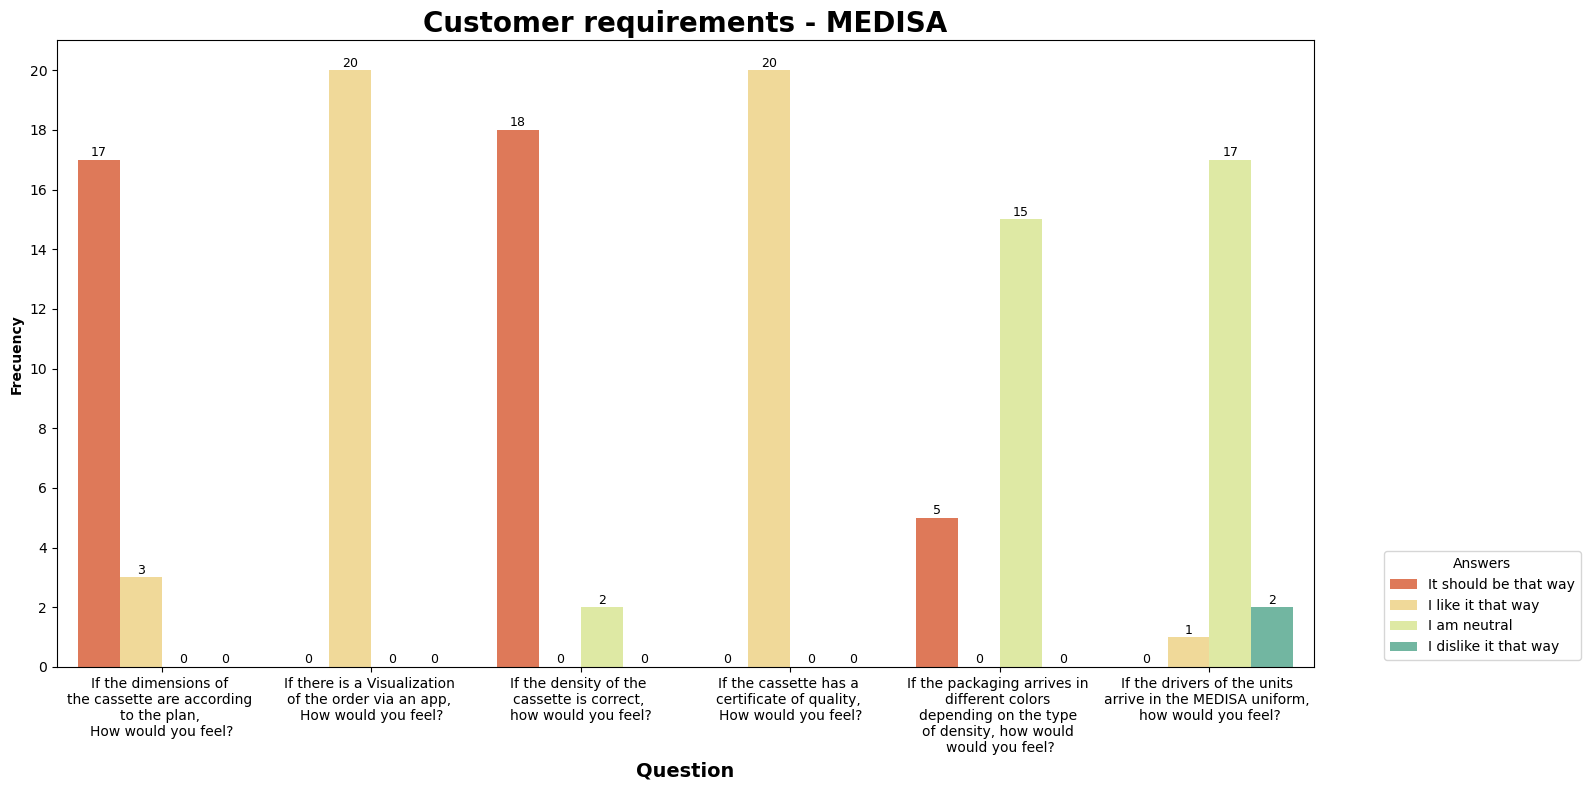

In [58]:
# Selecting the columns to analyze from xlsx
p_answer_column = 'Positive_response'
p_question_column = 'Description_positive_ques'

# Calculate the frequency of the values in the selected column.
frecuency_answer = df_kano[p_answer_column].value_counts()
frecuency_question = df_kano[p_question_column].value_counts()


# Plot
plt.figure(figsize=(16, 8))
ax = sns.countplot(df_kano, x=p_question_column, hue=p_answer_column, palette='Spectral')
plt.title('Customer requirements - MEDISA', fontweight='bold', size=20)
plt.xlabel('Question', fontweight='bold', size=14)
plt.ylabel('Frecuency', fontweight='bold')
plt.xticks(rotation=0)  
plt.legend(title='Answers', bbox_to_anchor=(1.05, 0), loc='lower left' )

# Set the interval on the y-axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Dysfunctional form of question analysis #

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

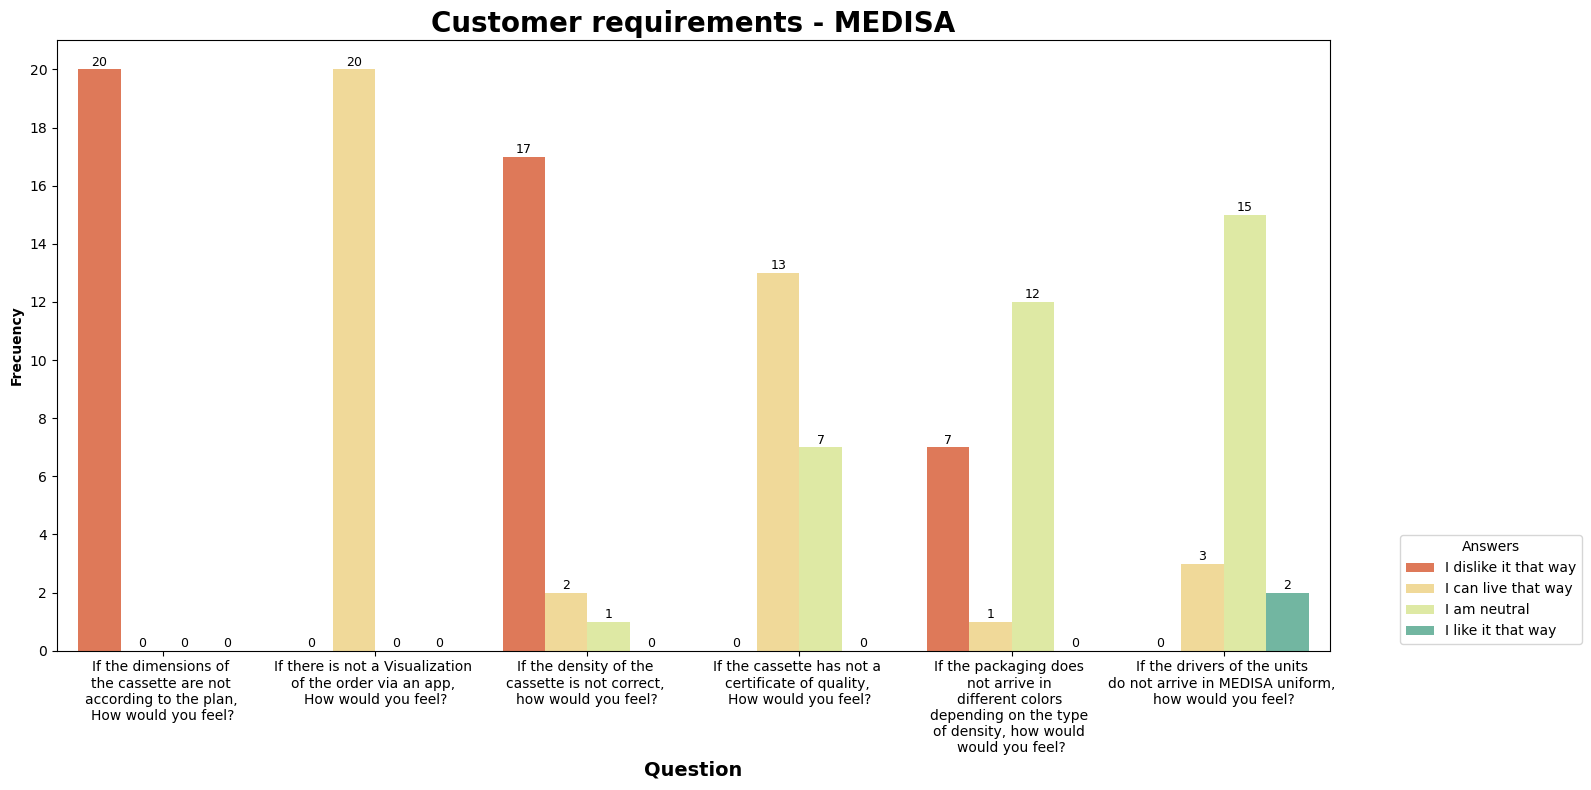

In [59]:
# Selecting the columns to analyze from xlsx
n_answer_column = 'Negative_response'
n_question_column = 'Description_negative_ques'

# Calculate the frequency of the values in the selected column.
frecuency_answer = df_kano[p_answer_column].value_counts()
frecuency_question = df_kano[p_question_column].value_counts()


# Plot
plt.figure(figsize=(16, 8))
ax = sns.countplot(df_kano, x=n_question_column, hue=n_answer_column, palette='Spectral')
plt.title('Customer requirements - MEDISA', fontweight='bold', size=20)
plt.xlabel('Question', fontweight='bold', size=14)
plt.ylabel('Frecuency', fontweight='bold')
plt.xticks(rotation=0)  
plt.legend(title='Answers', bbox_to_anchor=(1.05, 0), loc='lower left' )

# Set the interval on the y-axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

## Declaring Kano combinations ##

![Kano_Model](Kano_evaluation.png)

In [84]:
# Function to apply the condition and assign the Kano response
def assign_answer_kano(row):
    if row['Positive_response_number'] == 1 and row['Negative_response_number'] == 1:
        return 'Questionable'
    elif row['Positive_response_number'] == 1 and row['Negative_response_number'] in [2, 3, 4]:
        return 'Attractive'
    elif row['Positive_response_number'] == 1 and row['Negative_response_number'] == 5:
        return 'One-dimensional'
    elif row['Positive_response_number'] == 2 and row['Negative_response_number'] == 1:
        return 'Reverse'
    elif row['Positive_response_number'] == 2 and row['Negative_response_number'] in [2, 3, 4]:
        return 'Indifferent'
    elif row['Positive_response_number'] == 2 and row['Negative_response_number'] == 5:
        return 'Must be'
    elif row['Positive_response_number'] in [3, 4, 5] and row['Negative_response_number'] == 1:
        return 'Reverse'
    elif row['Positive_response_number'] in [3, 4] and row['Negative_response_number'] in [2, 3, 4]:
        return 'Indifferent'
    elif row['Positive_response_number'] in [3, 4, 5] and row['Negative_response_number'] == 5:
        return 'Must be'
    elif row['Positive_response_number'] == 5 and row['Negative_response_number'] in [1, 2, 3, 4]:
        return 'Reverse'
    elif row['Positive_response_number'] == 5 and row['Negative_response_number'] == 5:
        return 'Questionable'
    else:
        return 'NaN'

# Apply the function to create the new column 'Kano_response'
df_kano['Kano_response'] = df_kano.apply(assign_answer_kano, axis=1)

# Saves the updated DataFrame in a new CSV file
df_kano.to_csv("Updated_Kano_model.csv", index=False)

### Matrix of most common requirements and responses ###

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

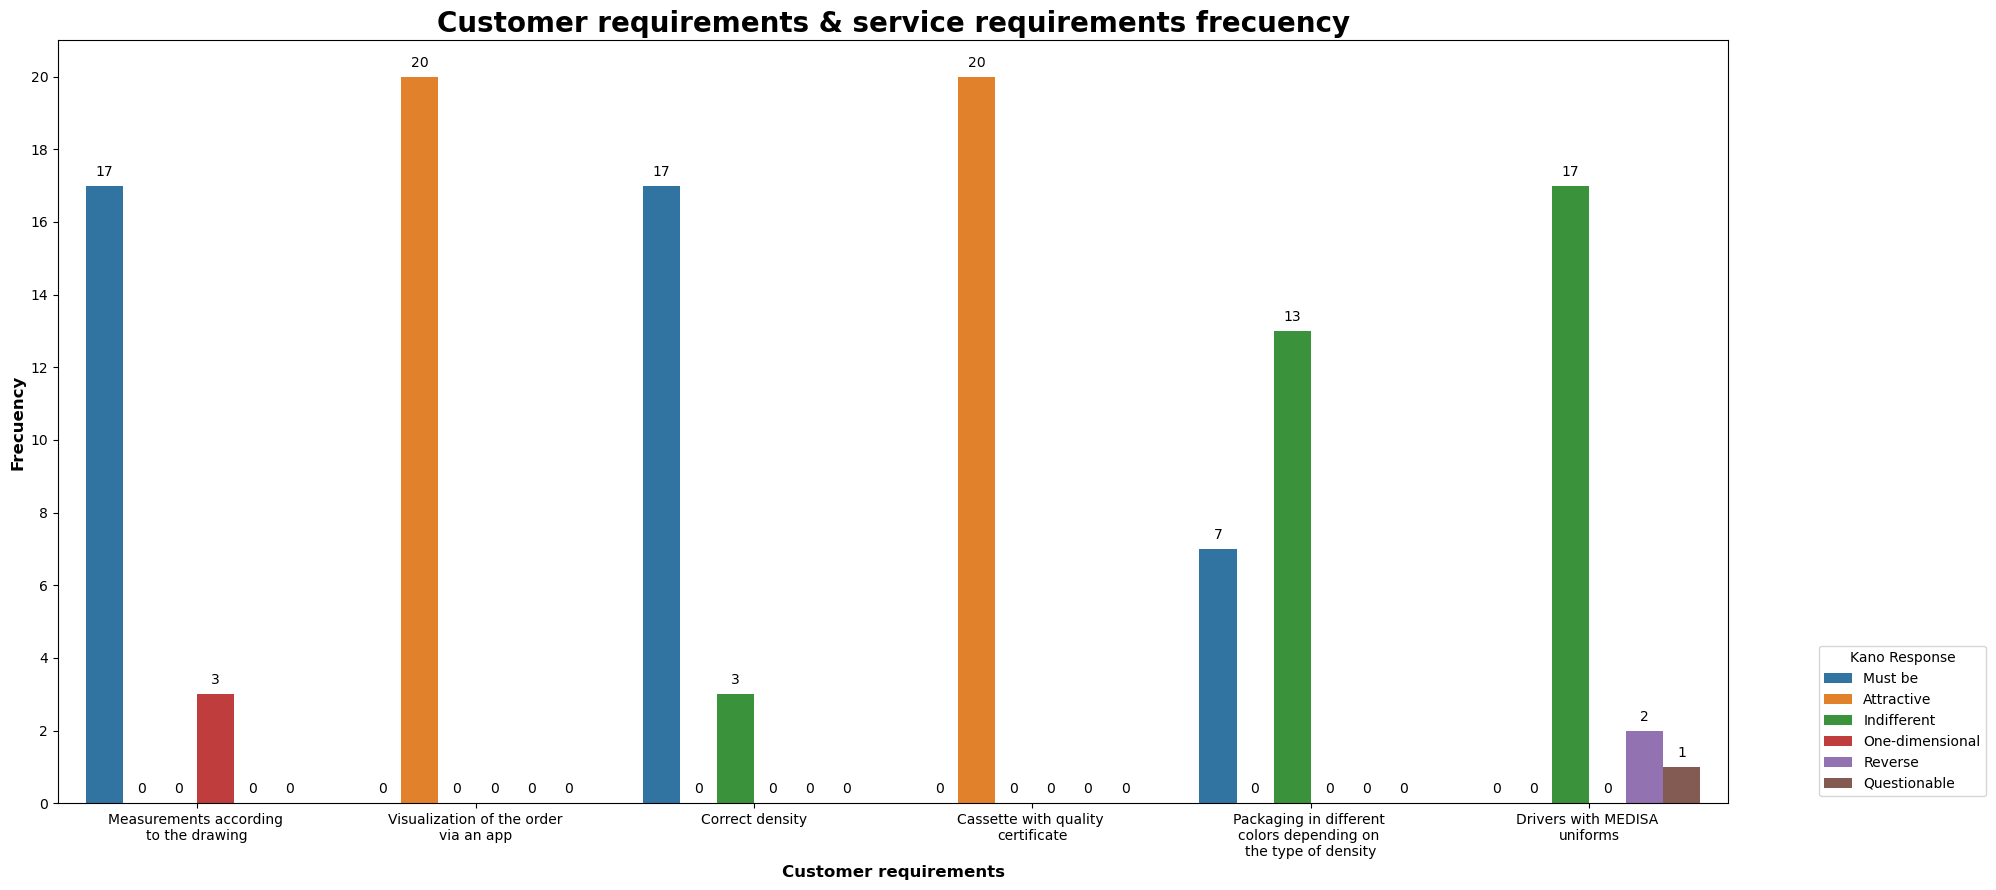

In [85]:
# Loading csv file with Kano responses (image)
df_kano_results = pd.read_csv('./Updated_Kano_model.csv')

# Chart most important requirements
plt.figure(figsize=(20, 9))
ax = sns.countplot(x='Attribute', hue='Kano_response', data=df_kano_results)
plt.xticks(rotation=0, ha='center')  # Rotar etiquetas del eje x para mejor legibilidad
plt.title('Customer requirements & service requirements frecuency', fontweight='bold', size=20)
plt.xlabel('Customer requirements', fontweight='bold', size=12)
plt.ylabel('Frecuency', fontweight='bold', size=12)
plt.legend(title='Kano Response', bbox_to_anchor=(1.05, 0), loc='lower left' )

ax.yaxis.set_major_locator(ticker.MultipleLocator(2)) 

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

## Comparation matrix ##

In [86]:
# Loading csv file with Kano responses (image)
df_kano_results = pd.read_csv('./Updated_Kano_model.csv')
# df_kano_results

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

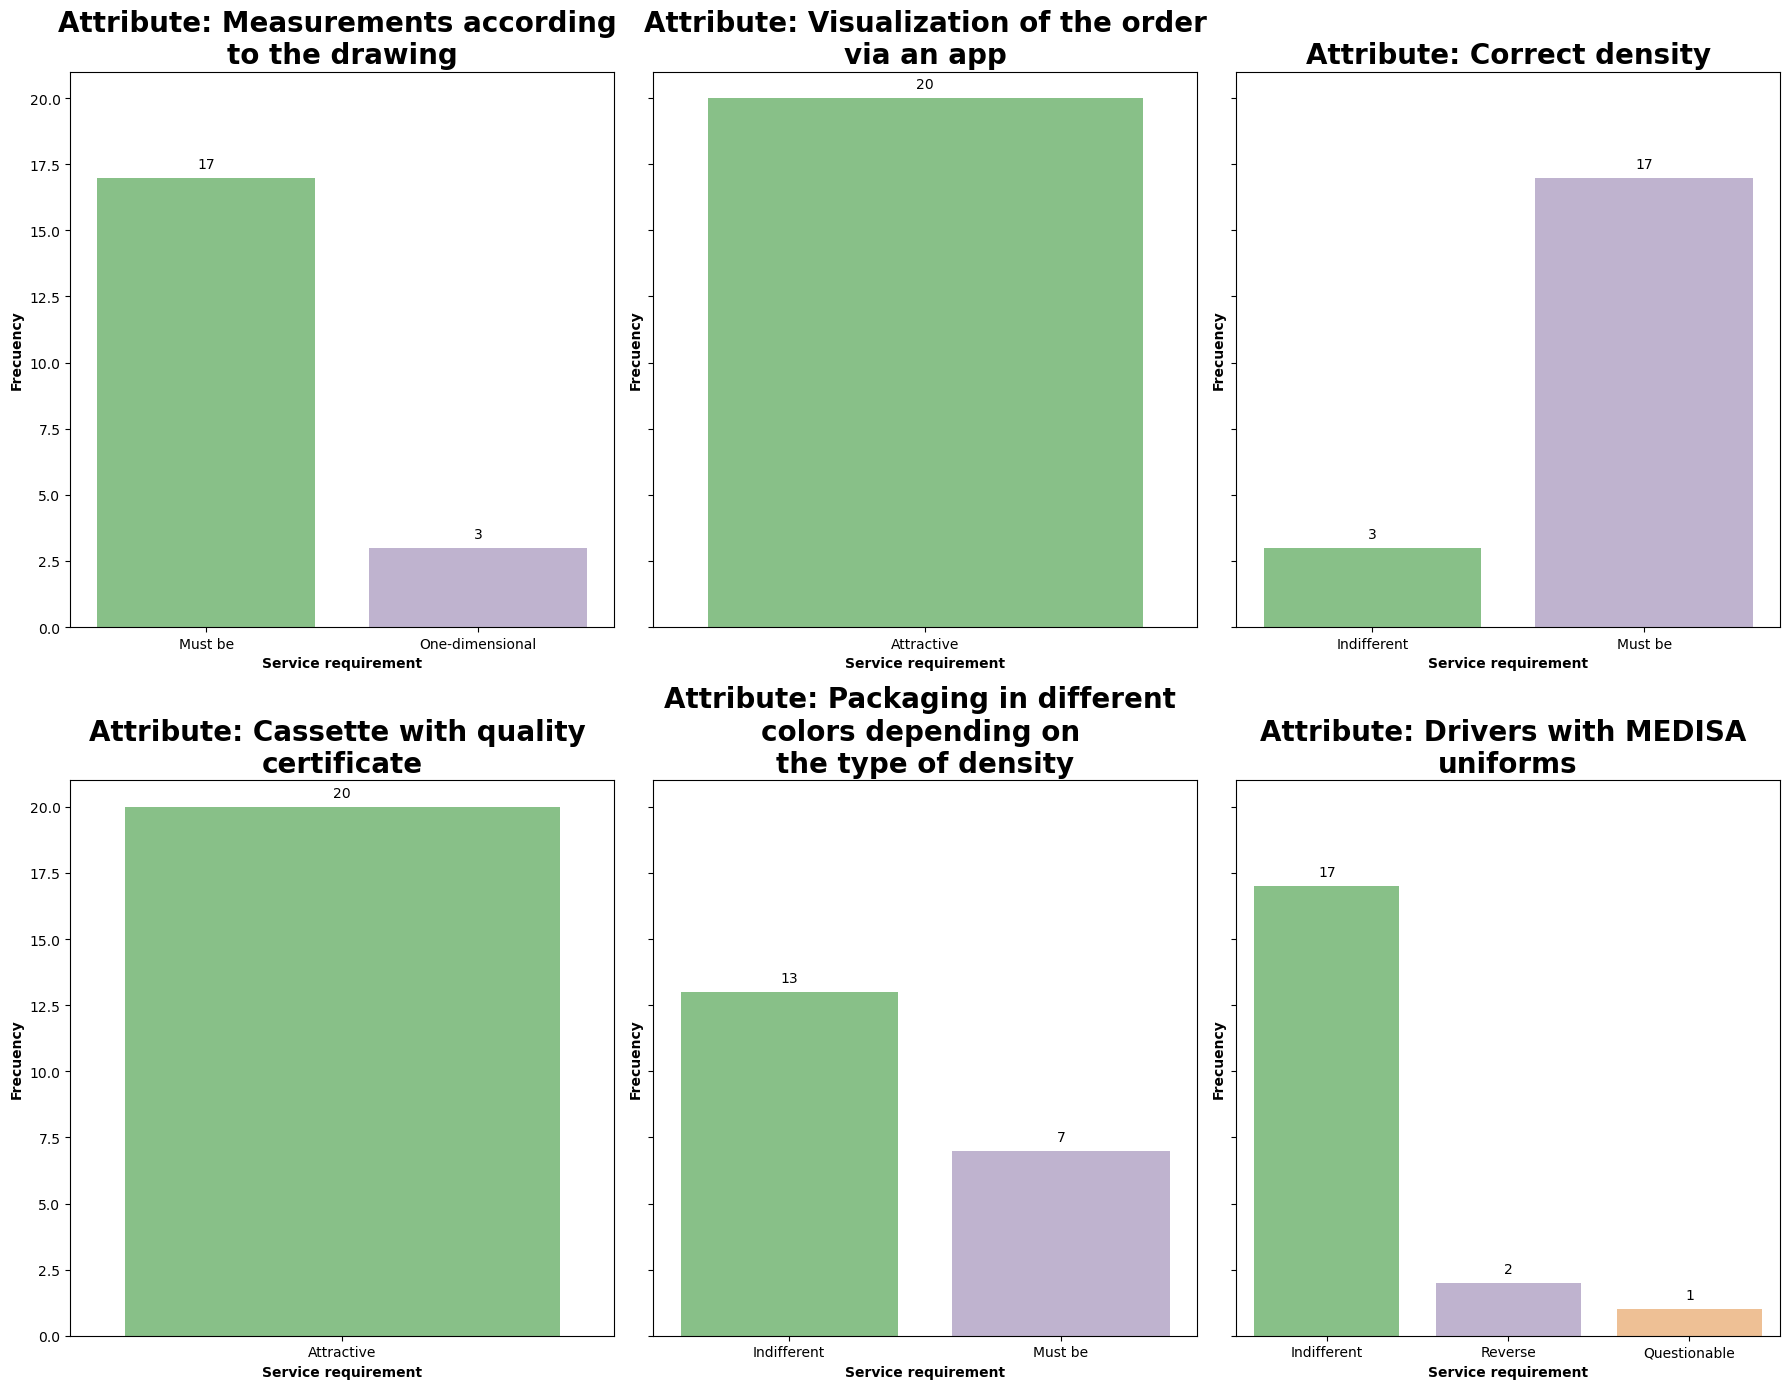

In [87]:
# Obtener valores únicos en la columna 'Attribute'
unique_attributes = df_kano_results['Attribute'].unique()

# Configurar el diseño de los sub-plots
num_attributes = len(unique_attributes)
num_cols = 3  # Puedes ajustar el número de columnas según tus preferencias
num_rows = -(-num_attributes // num_cols)  # Calcular el número de filas necesario

# Crear sub-plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 7 * num_rows), sharey=True)

# Iterar sobre cada atributo y crear la gráfica correspondiente
for i, attribute in enumerate(unique_attributes):
    row = i // num_cols
    col = i % num_cols
    subset = df_kano_results[df_kano_results['Attribute'] == attribute]

    # Utilizar countplot para la gráfica
    sns.countplot(x='Kano_response', data=subset, ax=axes[row, col], palette='Accent')

    # Agregar etiquetas a las barras (enteros)
    for p in axes[row, col].patches:
        height = int(p.get_height())
        axes[row, col].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Configuraciones adicionales para el sub-plot
    axes[row, col].set_title(f'Attribute: {attribute}', fontweight='bold', size=20)
    axes[row, col].set_xlabel('Service requirement', fontweight='bold', size=10)
    axes[row, col].set_ylabel('Frecuency', fontweight='bold', size=10)

    
# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()
